# Interactivity and Visualisation

Jupyter lab is like Mathematica and Matlab, allowing you to run code in a nice cell like interface

Jupyter also allows you to make your data interactive!!

## Ipywidgets

The first library we'll use is `ipywidgets`, using this allows us to run our code interactively.

### Make our first function interactive

In [10]:
import ipywidgets as ipyw
from ipywidgets.widgets import interact

In [11]:
import numpy as np

In [12]:
def mydecorator(f):
    
    def new_func():
        print('Cool beans')
        return f()
    return new_func


In [13]:
@mydecorator
def myfunction():
    print('I dont like beans')

In [14]:
myfunction()

Cool beans
I dont like beans


In [15]:
@interact(x=(-2,2, 0.3))
def f(x):
    return np.exp(x*2 +5)

interactive(children=(FloatSlider(value=-0.20000000000000018, description='x', max=2.0, min=-2.0, step=0.3), O…

### Automated inputs

We can do lots of different types of inputs, for example:

In [16]:
@interact(wavelength=(0.1,10.0, 0.3), 
          temperature=(0.1, 10000, 0.1), 
          temperature_scale=['Kelvin', 'Celsius', 'Fahrenheit'])
def weins_law(wavelength=0.1, 
              temperature=0.1, 
              temperature_scale='Kelvin', 
              include_greeting=True):

    h = 6.62607015e-34
    c = 299792458
    kB = 1.380e-23
    I0 = (2.0 * h * c ** 2) / wavelength ** 5
    
    tconv = {
        'Kelvin': lambda x: x,
        'Celsius': lambda x: x + 273.15,
        'Fahrenheit': lambda x: (x + 459.67)*5/9,
    }
    
    chosen_t = tconv[temperature_scale]
    
    result = I0 * np.exp(-( h * c ) / ( wavelength * kB * chosen_t(temperature)))
    
    if include_greeting:
        return f'Hello here is the value you wanted: {result}'
    else:
        return result
    

interactive(children=(FloatSlider(value=0.1, description='wavelength', max=10.0, min=0.1, step=0.3), FloatSlid…

### Customize widgets

We can even customize which widgets are used

In [17]:
ipyw.RadioButtons?

Init signature: ipyw.RadioButtons(*args, **kwargs)
Docstring:     
Group of radio buttons that represent an enumeration.

Only one radio button can be toggled at any point in time.

Parameters
----------
options: list
    The options for the dropdown. This can either be a list of values, e.g.
    ``['Galileo', 'Brahe', 'Hubble']`` or ``[0, 1, 2]``, or a list of
    (label, value) pairs, e.g.
    ``[('Galileo', 0), ('Brahe', 1), ('Hubble', 2)]``.

index: int
    The index of the current selection.

value: any
    The value of the current selection. When programmatically setting the
    value, a reverse lookup is performed among the options to check that
    the value is valid. The reverse lookup uses the equality operator by
    default, but another predicate may be provided via the ``equals``
    keyword argument. For example, when dealing with numpy arrays, one may
    set ``equals=np.array_equal``.

label: str
    The label corresponding to the selected value.

disabled: bool
    Whe

In [18]:
@interact(wavelength=(0.1,10.0, 0.3), 
          temperature=(0.1, 10000, 0.1), 
          temperature_scale=ipyw.RadioButtons(
              options=['Kelvin', 'Celsius', 'Fahrenheit'], 
              value='Kelvin', 
              description="Temp Scale"))
def weins_law_II(wavelength=0.1, 
              temperature=0.1, 
              temperature_scale='Kelvin', 
              include_greeting=True):

    h = 6.62607015e-34
    c = 299792458
    kB = 1.380e-23
    I0 = (2.0 * h * c ** 2) / wavelength ** 5
    
    tconv = {
        'Kelvin': lambda x: x,
        'Celsius': lambda x: x + 273.15,
        'Fahrenheit': lambda x: (x + 459.67)*5/9,
    }
    
    chosen_t = tconv[temperature_scale]
    
    result = I0 * np.exp(-( h * c ) / ( wavelength * kB * chosen_t(temperature)))
    
    if include_greeting:
        return f'Hello here is the value you wanted: {result}'
    else:
        return result

interactive(children=(FloatSlider(value=0.1, description='wavelength', max=10.0, min=0.1, step=0.3), FloatSlid…

All there is to it!

## Matplotlib

Matplotlib is *THE* plotting library in python

### Activating matplotlib

To activate it we need to first import it

In [19]:
import matplotlib.pyplot as plt

Then activate the magic command

In [20]:
%matplotlib widget

This activates the matplotlib interactive backend. There are many types, including:

 - `widget` (Jupyter lab)
 - `notebook` (Jupyter notebook)
 - `inline` (No interactivity, every figure is a png)

### Plotting your first figure

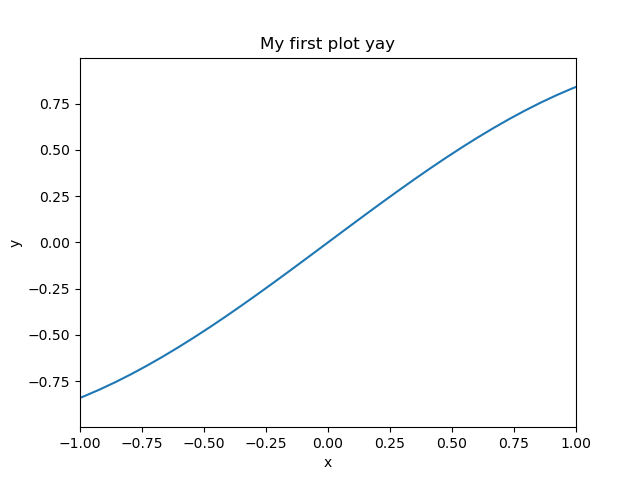

In [21]:

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.figure()
plt.plot(x, y)
plt.title('My first plot yay')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1, 1])
plt.ylim([y.min(), y.max()])
#plt.savefig('myfirstplot.png')
plt.show()

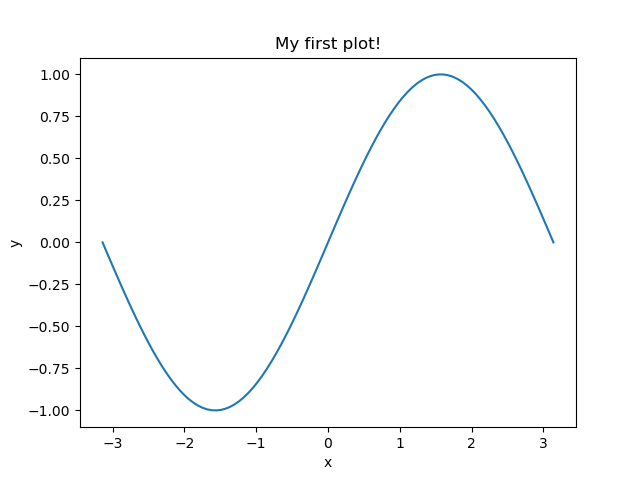

In [22]:

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.figure()
plt.title('My first plot!')
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Plotting multiple figures

We can use the `subplots` function to create multiple figures. It takes arguments of number of rows and number of columns. For example:
 - `subplots(2,1)` 2 rows, 1 columns (2 plots)
 - `subplots(1,2)` 1 rows, 2 columns (2 plots)
 - `subplots(2,2)` 2 rows, 2 columns (4 plots)
 


It will return a `figure` that represents the plot and *axes* that can be unpacked representing columns and rows axes.
For example, `plt.subplots(2,1)` will return 2 axes so we can unpack them like this: `figure, (ax1, ax2) = plt.subplots(2,1)`. Lets try an example:

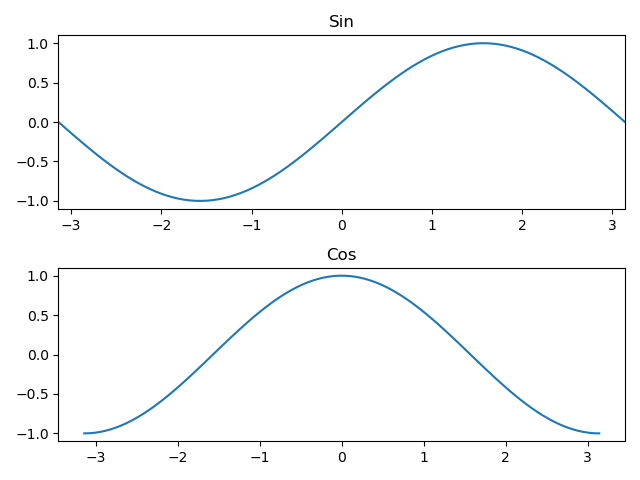

In [23]:
x1 = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x1)

y2 = np.cos(x1)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(x1, y1)
ax1.set_title('Sin')
ax1.set_xlim([x1.min(), x1.max()])
ax2.plot(x1, y2)
ax2.set_title('Cos')
fig.tight_layout()
plt.show()


For something like `subplots(2,2)` we can *double* unpack them

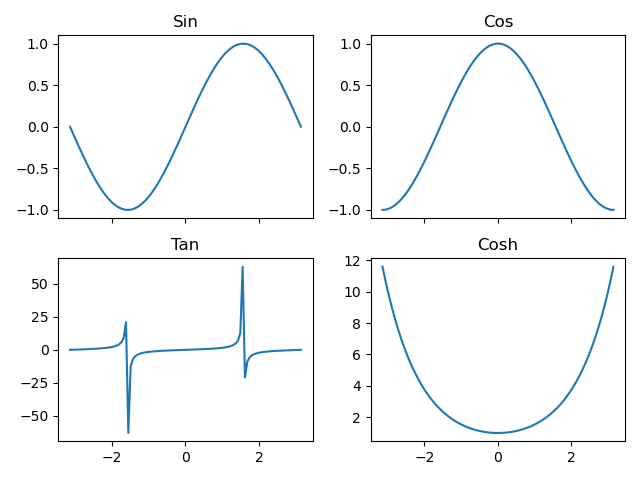

In [24]:
x1 = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x1)

y2 = np.cos(x1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)

ax1.plot(x1, y1)
ax1.set_title('Sin')
ax2.plot(x1, y2)
ax2.set_title('Cos')
ax3.plot(x1, np.tan(x1))
ax3.set_title('Tan')
ax4.plot(x1, np.cosh(x1))
ax4.set_title('Cosh')

fig.tight_layout()

plt.show()


Sometimes your plots can overlap, adding a `fig.tight_layout()` can fix it up!

### Combining interactivity

We can combine ipywidgets to introduce interactivity into our plots. We need to store a reference to the plot data and then update it in the `interact` function.
Lets try it!

interactive(children=(FloatSlider(value=1.0, description='scale', max=7.0, min=1.0), Output()), _dom_classes=(…

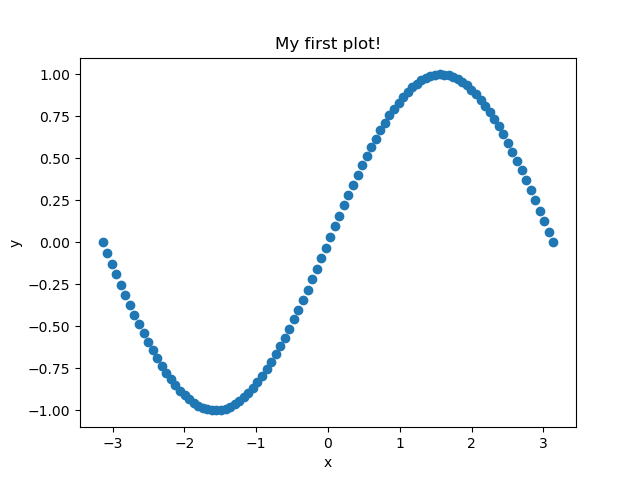

In [25]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.figure()
plt.title('My first plot!')
scatter = plt.scatter(x, y) # plot returns two things, the first is the line which we need




plt.xlabel('x')
plt.ylabel('y')

@interact(scale=(1.0, 7.0))
def update(scale=1.0):
    
    data = np.array([x, np.sin(x*scale)]).T
    print(data.shape)
    scatter.set_offsets(data)
    


### Exercise multi-interactive

Fix the code to make the multi-version update all plots:

In [26]:
a = [1, 2, 3, 4]

x, y, z, k = a

print(x)
print(y)
print(z)
print(k)

1
2
3
4


interactive(children=(FloatSlider(value=0.0, description='scale', max=10.0, min=-10.0), Output()), _dom_classe…

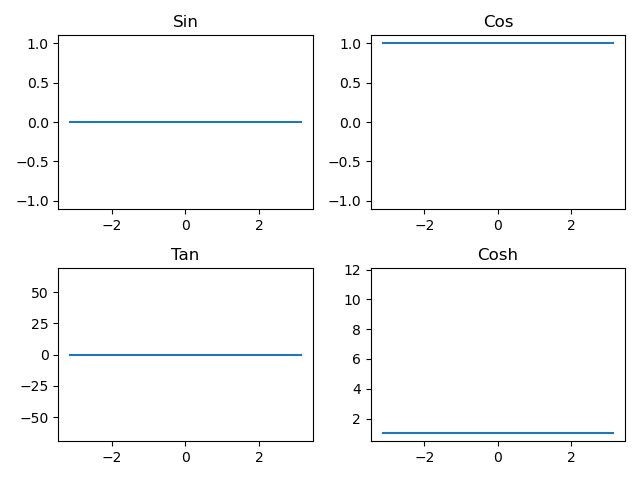

In [27]:
x1 = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x1)

y2 = np.cos(x1)
y3 = np.tan(x1)
y4 = np.cosh(x1)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

line1, =ax1.plot(x1, y1)
line2, = ax2.plot(x1, y2)
line3, = ax3.plot(x1, y3)
line4, = ax4.plot(x1, y4)


ax1.set_title('Sin')
ax2.set_title('Cos')
ax3.set_title('Tan')
ax4.set_title('Cosh')

fig.tight_layout()

@interact(scale=(-10, 10, 0.1))
def update_multi(scale):
    line1.set_ydata(np.sin(x1*scale))
    line2.set_ydata(np.cos(x1*scale))
    line3.set_ydata(np.tan(x1*scale))
    line4.set_ydata(np.cosh(x1*scale))
    


Additionally instead of axis unpacking you can use it like an array for larger grids. For example doing:
    
    fig, ((ax1, ax2......),(ax56, ax57,....)) = plt.subplots(60,60)
can be laborious. You can do this:
    
    fig, ax = plt.subplots(60,60)
    ax[0,0].blah 
    ax[59,10].blah
    
You can also remove axes from a figure for visual quality using the `remove` function. Take a look at this example

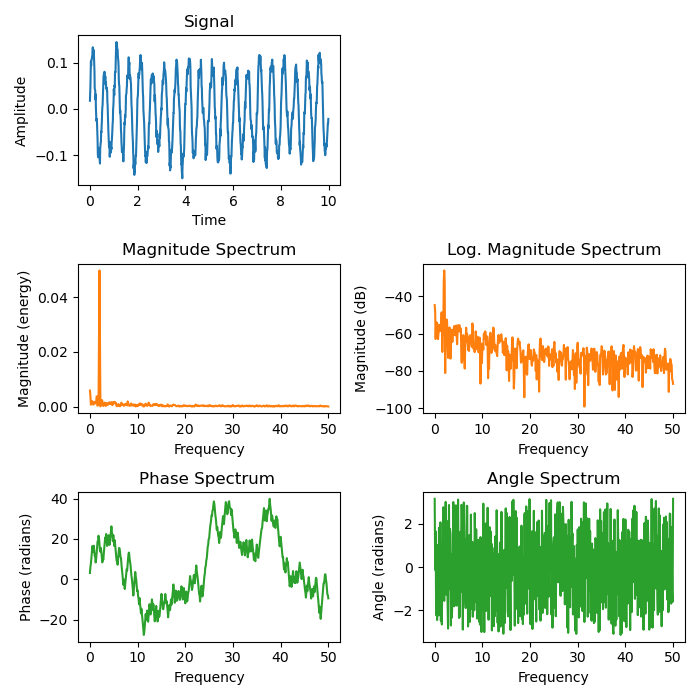

In [28]:
np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axs[0, 0].set_title("Signal")
axs[0, 0].plot(t, s, color='C0')
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axs[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

### Different plot types

Matplotlib has many types of plots You can also mix and match plots on the same plot!

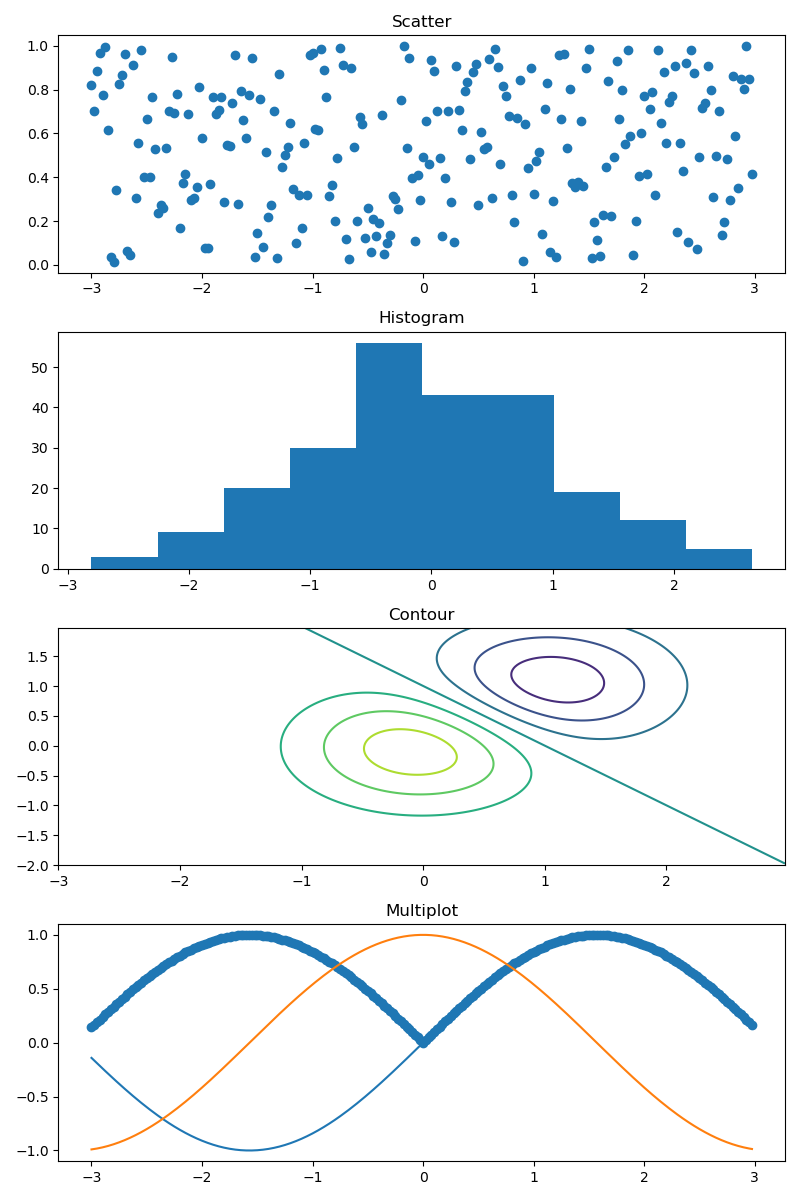

In [29]:
fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(4,1, figsize=(8,12))

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

ax1.scatter(x, np.random.rand(x.shape[0]), )
ax1.set_title('Scatter')

ax2.hist(np.random.normal(size=(x.shape[0])))
ax2.set_title('Histogram')

ax3.set_title('Contour')
ax3.contour(X, Y, Z)

ax4.set_title('Multiplot')
ax4.plot(x, np.sin(x))
ax4.plot(x, np.cos(x))
ax4.scatter(x, np.abs(np.sin(x)))

#ax3.remove()


fig.tight_layout()
fig.savefig('test.eps')
plt.show()

Of course any of the figs can be saved into any format using `savefig` for example:
   - `fig.savefig('plot.pdf')`
   - `fig.savefig('plt.jpg')`
   - `fig.savefig('png')`
   

For publications **pdf** is my choice! Try it on any of the previous plots!

## 2D and 3D

We can also plot in 2D! The function of choice is `imshow`

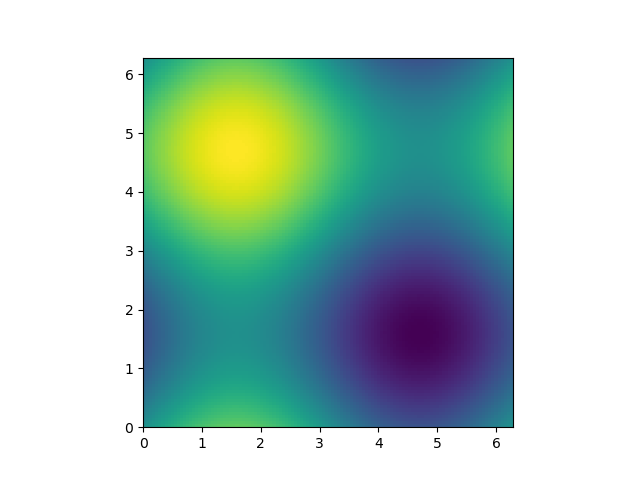

In [30]:
# Gen our coordinates
x = np.linspace(0, 2*np.pi, 120)
y = np.linspace(0, 2*np.pi, 120)

# Make our mesh

X, Y = np.meshgrid(x,y)
def ourfunc(x, y):
    return np.sin(x) + np.sin(y)

plt.figure()
plt.imshow(ourfunc(X,Y), extent=[x.min(), x.max(), y.min(), y.max()])
plt.show()

Again we can make it interactive

interactive(children=(FloatSlider(value=0.0, description='x_shift', max=10.0, min=-10.0), FloatSlider(value=0.…

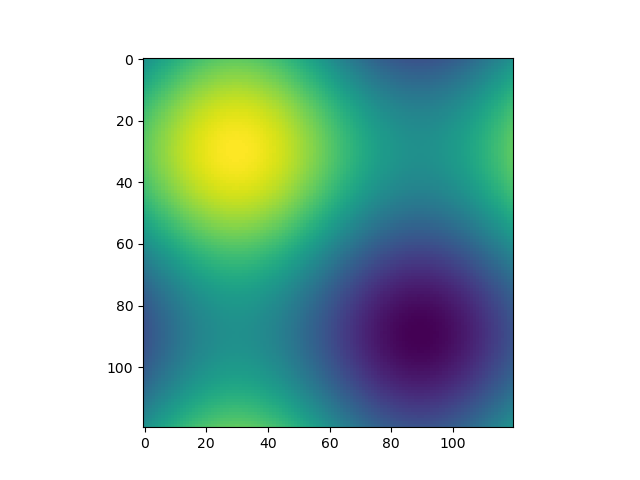

In [31]:
fig, ax = plt.subplots(1,1)
im = ax.imshow(ourfunc(X, Y))

@interact(x_shift=(-10,10,0.1), y_shift=(-10,10,0.1))
def update_imshow(x_shift,y_shift):
    data = ourfunc(X+x_shift, Y+y_shift)
    im.set_data(data)
    
    

3D is also really easy using the `projection` argument

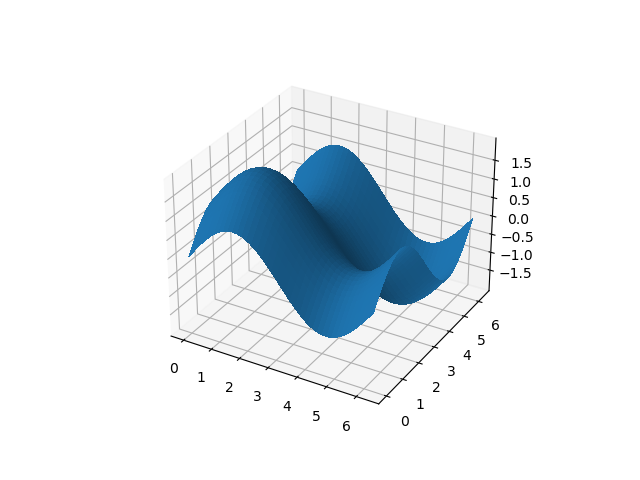

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Z = ourfunc(X, Y)

surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)
plt.show()

And again it can be interactive! With a bit of hacking

interactive(children=(FloatSlider(value=0.0, description='x_shift', max=10.0, min=-10.0), FloatSlider(value=0.…

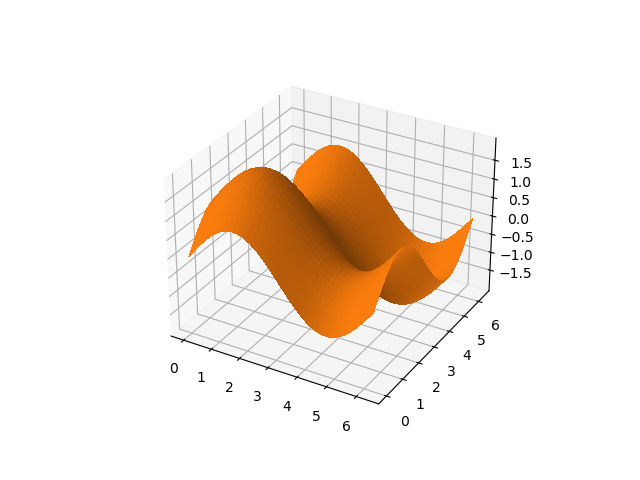

In [33]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

Z = ourfunc(X, Y)

surf = [ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)]

@interact(x_shift=(-10,10,0.1), y_shift=(-10,10,0.1))
def update_imshow(x_shift,y_shift):
    surf[0].remove()
    Z = ourfunc(X+x_shift, Y+y_shift)
    surf[0] = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)

## Animations

Finally lets try animations.

Animations work almost exactly like the `interact` except we make use of the `FuncAnimation` functions from matplotlib animations. Lets try it out:

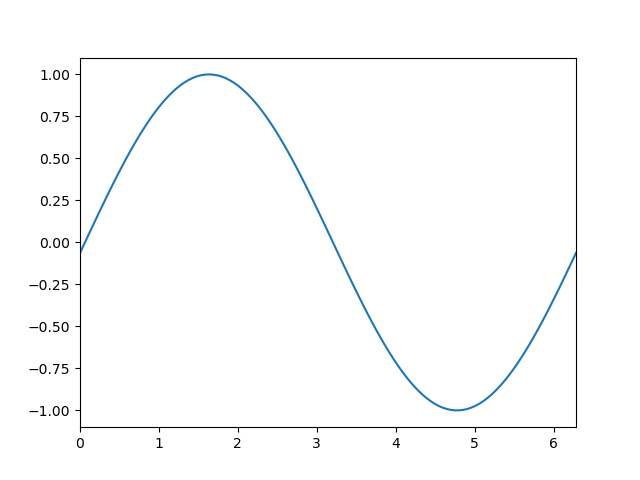

In [34]:
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots(2,1)

line, = ax.plot([])     # A tuple unpacking to unpack the only plot

# Fix the axes
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

# build an update function like interact except we only have one argument 
def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=20)
anim.save('plot.mp4')
plt.show()

In [35]:
from IPython import display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()                   # avoid plotting a spare static plot

In [36]:
Func

NameError: name 'Func' is not defined

We can also save it as a gif or an mp4 (if we have ffmpeg) using `save`

In [37]:
anim.save('plot.mp4')

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7ff760f27640>>
Traceback (most recent call last):
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/matplotlib/animation.py", line 1410, in _step
    self._init_draw()
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/matplotlib/animation.py", line 1698, in _init_draw
    self._draw_frame(frame_data)
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/matplotlib/animation.py", line 1720, in _draw_frame
    self._drawn_artists = self._func(framedata, *self.

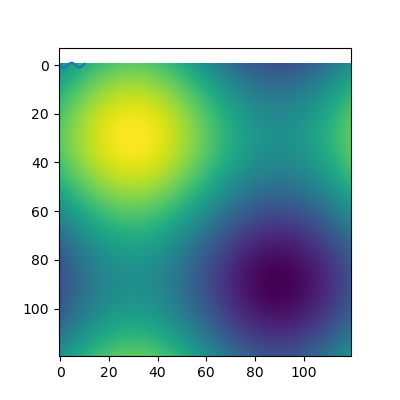

In [45]:
from matplotlib.animation import FuncAnimation


fig, ax1 = plt.subplots(1, 1, figsize=(4,4))


im = ax1.imshow(ourfunc(X, Y))
x = np.linspace(0,10)
y = np.sin(x)
line = ax1.plot(x, y)


# build an update function like interact except we only have one argument 
def animate(frame_num):
    shift = frame_num/4
    
    data = ourfunc(X + shift, Y + shift)
    im.set_data(data)  
    line[0].set_ydata(np.sin(x*frame*2.5)*100)
    im.autoscale()
    
    
    return im

anim = FuncAnimation(fig, animate, frames=100, interval=50)
plt.show()

We can plot as a video embedded in jupyter by converting it to html5 video (Requires ffmpeg)

In [42]:
from IPython import display
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()                   # avoid plotting a spare static plot

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x7ff760f27640>>
Traceback (most recent call last):
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/matplotlib/animation.py", line 1408, in _step
    still_going = super()._step(*args)
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/matplotlib/animation.py", line 1107, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/Users/ahmed/opt/anaconda3/envs/advpython/lib/python3.9/site-packages/matplotlib/animation.py", line 1126, in _draw_next_frame
    self._draw_frame(

NameError: name 'frame' is not defined